<a href="https://colab.research.google.com/github/ckj18/ToBigs_workspace/blob/main/week9_RS_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import 

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [8]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
cd '/content/drive/MyDrive'

/content/drive/MyDrive


## Preprocessing & EDA

In [10]:
# 데이터 로드
link = pd.read_csv("links.csv")
movie = pd.read_csv("movies.csv")
rating = pd.read_csv("ratings.csv")
tag = pd.read_csv("tags.csv")

### Links

In [14]:
link

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [15]:
link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [16]:
## 각 ID는 고유값으로 특징이 없음
# 결측값 확인
print(link.isnull().sum())
link[link['tmdbId'].isnull()]

movieId    0
imdbId     0
tmdbId     8
dtype: int64


,movieId,imdbId,tmdbId
624,791,113610,NaN
843,1107,102336,NaN
2141,2851,81454,NaN
3027,4051,56600,NaN
5532,26587,92337,NaN
5854,32600,377059,NaN
6059,40697,105946,NaN
7382,79299,874957,NaN


### Movies

In [17]:
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [18]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


#### 시각화 1. 연도별 영화 분포

In [19]:
# title에서 연도를 분리 
movie_cp = movie.copy()
movie_cp['year'] = movie_cp['title'].str.extract('(\(\d\d\d\d\))') 
movie_cp['year'] = movie_cp['year'].str.extract('(\d\d\d\d)')

In [20]:
# 결측값이 있는 행 확인 - title에 연도가 포함되지 않음
movie_cp[movie_cp['year'].isnull()]

#결측값 제거
movie_cp = movie_cp.dropna()

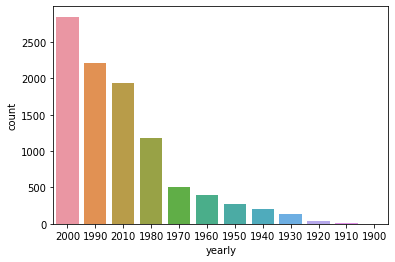

In [21]:
# 연도별 분포 확인
movie_cp['yearly'] = movie_cp['year'].apply(lambda x: x[:-1]+"0")

sns.countplot(x='yearly', data=movie_cp, order=movie_cp['yearly'].value_counts().index)
plt.show()

# 영화가 가장 많은 연도는 2000년대
# 이후로는 1990 -> 2010 -> 1980 -> 1970 순으로 영화가 많음

#### 시각화 2. 장르별 영화 분포

In [22]:
# 장르 구분
movie['genres'] = movie['genres'].apply(lambda x: x.split('|'))

In [23]:
movie['genres']

0       [Adventure, Animation, Children, Comedy, Fantasy]
1                          [Adventure, Children, Fantasy]
2                                       [Comedy, Romance]
3                                [Comedy, Drama, Romance]
4                                                [Comedy]
                              ...                        
9737                 [Action, Animation, Comedy, Fantasy]
9738                         [Animation, Comedy, Fantasy]
9739                                              [Drama]
9740                                  [Action, Animation]
9741                                             [Comedy]
Name: genres, Length: 9742, dtype: object

In [24]:
genre_list = []
for idx in range(len(movie['genres'])):
  for genre in movie['genres'].iloc[idx]:
    if genre not in genre_list:
      genre_list.append(genre)  

# 총 20개의 장르가 존재
print(len(genre_list), genre_list)

20 ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX', 'Western', 'Film-Noir', '(no genres listed)']


In [25]:
# 장르별 영화 개수
movie_count = {}

for genre1 in genre_list:
  for idx in range(len(movie['genres'])):
    for genre2 in movie['genres'].iloc[idx]:
      if genre1 == genre2:
        if genre1 not in movie_count:
          movie_count[genre1] = 1
        else:
          movie_count[genre1] += 1

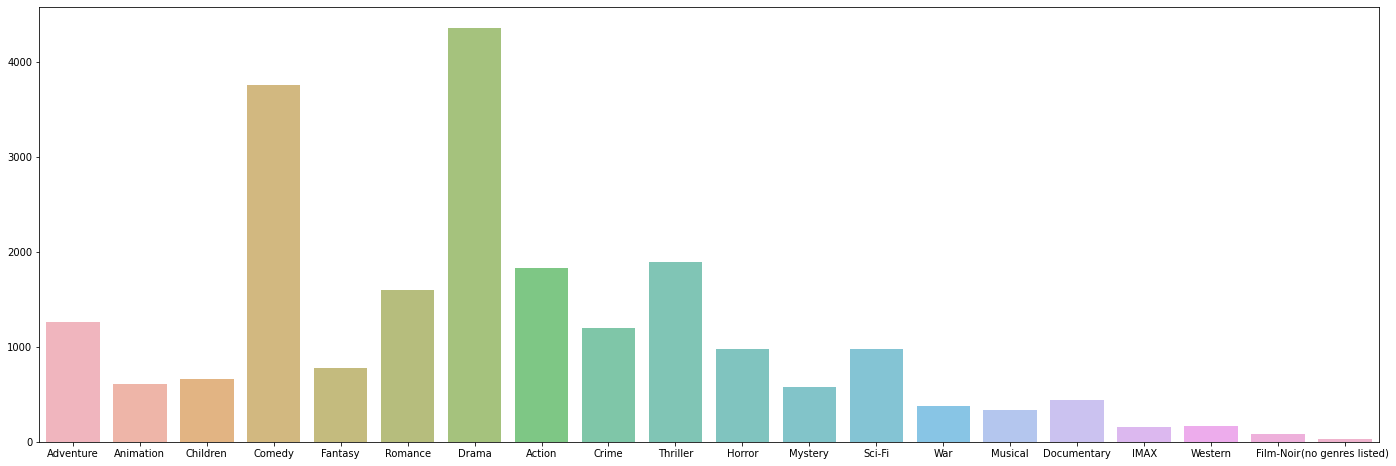

In [26]:
# 장르별 분포 확인
plt.figure(figsize=(24,8))
sns.barplot(x=genre_list, y=list(movie_count.values()), alpha=0.7)
plt.show()

# 드라마 장르의 영화가 가장 많음
# 이후로는 코미디 -> 스릴러 -> 액션 -> 로맨스 순으로 인기가 많음

### Ratings

In [27]:
rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [28]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


#### 시각화 3. 평점별 영화 분포

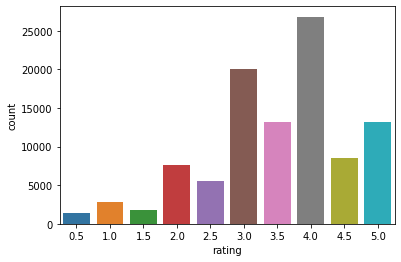

In [29]:
# rating 분포 확인 
sns.countplot(x='rating', data=rating)
plt.show()

# 평점은 4.0이 가장 많음
# 이후로는 3.0 -> 5.0 -> 3.5 -> 4.5 순으로 많음

### tags

In [30]:
tag

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [31]:
tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [32]:
# 대소문자 통일
tag['tag'] = tag['tag'].str.lower()

#### 시각화 4. 유저별 태그 분포 확인

In [33]:
# userId의 tag 리스트를 저장
user_list = list(set(tag['userId']))

In [34]:
# 태그마다의 카운팅
tag_count = {}
for id in user_list:
  tag_count[id] = len(set(tag['tag'][tag['userId']==id]))

tag_list = dict(sorted(tag_count.items(), key=lambda x: x[1], reverse=True))

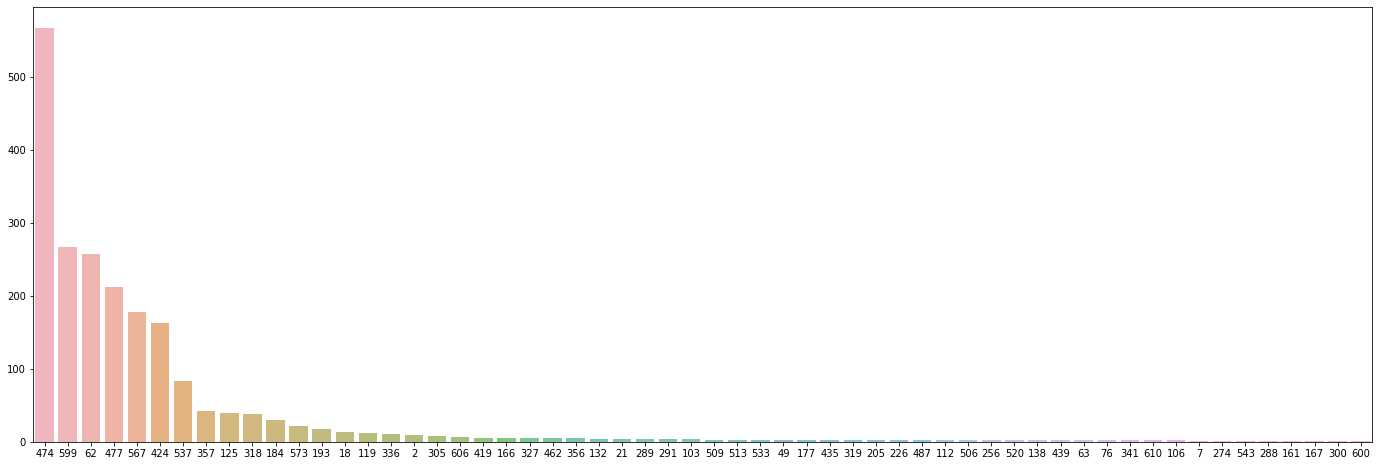

In [66]:
plt.figure(figsize=(24,8))
sns.barplot(x=list(tag_list.keys()), y=list(tag_list.values()), alpha=0.7, order=tag_list)
plt.show()

# 관람한 영화 태그에서 userId: 474, 599, 62, 477, 567, 424 순으로 많음
# 태그별로 영화를 추천할 때, 유저별 선호도 파악이 가능

#### 시각화 5. user_id: 474 영화 장르별 분포 확인

In [37]:
# 474 유저는 총 2108개의 영화를 관람
# 가장 핫한 유저
user_movies = rating[rating['userId'] == 474]
user_movies

,userId,movieId,rating,timestamp
73092,474,1,4.0,978575760
73093,474,2,3.0,1046886814
73094,474,5,1.5,1053021982
73095,474,6,3.0,1047054565
73096,474,7,3.0,978576381
...,...,...,...,...
75195,474,55814,4.0,1238350406
75196,474,56563,3.5,1201832992
75197,474,56607,3.5,1238350552
75198,474,63433,4.0,1238350601


In [38]:
user_genres = movie['genres'][movie['movieId'].isin(user_movies['movieId'])]

genre_list2 = []
for idx in range(len(user_genres)):
  for genre in user_genres.iloc[idx]:
    if genre not in genre_list2:
      genre_list2.append(genre)  

# 총 19개의 장르가 존재
print(len(genre_list2), genre_list2)

# 장르별 영화 개수
movie_count2 = {}

for genre1 in genre_list:
  for idx in range(len(user_genres)):
    for genre2 in user_genres.iloc[idx]:
      if genre1 == genre2:
        if genre1 not in movie_count2:
          movie_count2[genre1] = 1
        else:
          movie_count2[genre1] += 1

19 ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Action', 'Crime', 'Thriller', 'Romance', 'Drama', 'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX', 'Western', 'Film-Noir']


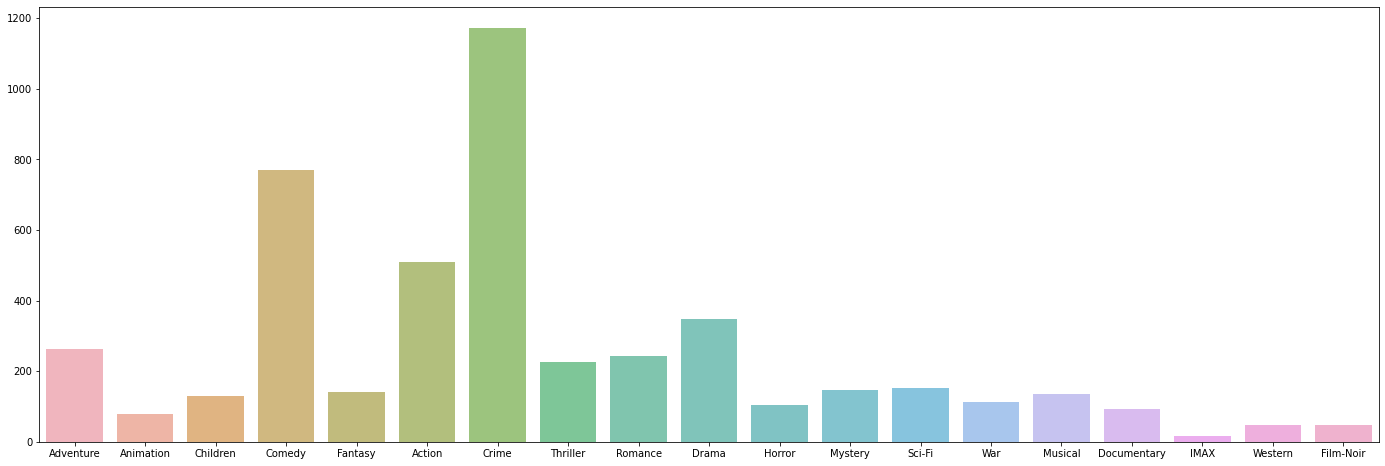

In [39]:
# 장르별 분포 확인
plt.figure(figsize=(24,8))
sns.barplot(x=genre_list2, y=list(movie_count2.values()), alpha=0.7)
plt.show()

# 범죄 장르의 영화가 가장 많음
# 이후로는 코미디 -> 액션 -> 드라마 -> 모험 순으로 선호 장르
# 장르별 영화 분포와는 다른 양상을 보여줌

## Recommend System

### Memory-based CF

#### Item-based CF 

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

# Item-based CF
movies_items = pd.DataFrame(index=movie['movieId'], columns=genre_list)

# genre 포함 여부에 대한 movieId 데이터프레임 생성, 결측값은 0으로 대체 
for id in range(len(movies_items)):
  for genre in movie.iloc[id]['genres']:
    movies_items.iloc[id][genre] = 1
movies_items = movies_items.fillna(0)

movies_items

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
193583,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
193585,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
# 코사인 유사도를 계산
cos_movies = pd.DataFrame(cosine_similarity(movies_items, movies_items))
cos_movies.index = movies_items.index
cos_movies.columns = movies_items.index

cos_movies

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.774597,0.316228,0.258199,0.447214,0.000000,0.316228,0.632456,0.000000,0.258199,...,0.447214,0.316228,0.316228,0.447214,0.0,0.670820,0.774597,0.00000,0.316228,0.447214
2,0.774597,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.816497,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.288675,0.333333,0.00000,0.000000,0.000000
3,0.316228,0.000000,1.000000,0.816497,0.707107,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.353553,0.000000,0.500000,0.000000,0.0,0.353553,0.408248,0.00000,0.000000,0.707107
4,0.258199,0.000000,0.816497,1.000000,0.577350,0.000000,0.816497,0.000000,0.000000,0.000000,...,0.288675,0.408248,0.816497,0.000000,0.0,0.288675,0.333333,0.57735,0.000000,0.577350
5,0.447214,0.000000,0.707107,0.577350,1.000000,0.000000,0.707107,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.707107,0.000000,0.0,0.500000,0.577350,0.00000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.670820,0.288675,0.353553,0.288675,0.500000,0.288675,0.353553,0.000000,0.500000,0.288675,...,0.750000,0.353553,0.353553,0.500000,0.0,1.000000,0.866025,0.00000,0.707107,0.500000
193583,0.774597,0.333333,0.408248,0.333333,0.577350,0.000000,0.408248,0.000000,0.000000,0.000000,...,0.577350,0.408248,0.408248,0.577350,0.0,0.866025,1.000000,0.00000,0.408248,0.577350
193585,0.000000,0.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.707107,0.707107,0.000000,0.0,0.000000,0.000000,1.00000,0.000000,0.000000


In [42]:
# 비슷한 장르의 영화 추천
def recommend_movies(movie_id, data, top_k=5):
  idx = movie[movie['movieId'] == movie_id].index.values
  filter = (np.array(data)).argsort()[:,::-1]

  print('영화 제목: ', movie['title'].loc[movie['movieId'] == movie_id].values[0])
  print('영화 장르: ',  movie['genres'].loc[movie['movieId'] == movie_id].values[0])

  top_movies = filter[idx,:].reshape(-1)
  top_movies = top_movies[top_movies != idx]

  top_list  = movie.iloc[top_movies][: top_k]

  print(f"########## Top {top_k} Movies ##########\n")
  print(f"MovieId: {movie_id}에 대한 비슷한 장르 영화")
  return top_list

In [43]:
recommend_movies(1325, cos_movies, top_k=10)

영화 제목:  Amityville: A New Generation (1993)
영화 장르:  ['Horror']
########## Top 10 Movies ##########

MovieId: 1325에 대한 비슷한 장르 영화


,movieId,title,genres
9582,175199,Annabelle: Creation (2017),[Horror]
1012,1323,Amityville 3-D (1983),[Horror]
1892,2515,Children of the Corn II: The Final Sacrifice (...,[Horror]
4984,7650,"Witchfinder General (Conquerer Worm, The) (1968)",[Horror]
1017,1328,"Amityville Curse, The (1990)",[Horror]
1890,2513,Pet Sematary (1989),[Horror]
1015,1326,Amityville II: The Possession (1982),[Horror]
2652,3550,The Hunger (1983),[Horror]
2273,3016,Creepshow (1982),[Horror]
2274,3017,Creepshow 2 (1987),[Horror]


#### User-based CF

In [44]:
# user_based CF
movie_rating = pd.merge(rating, movie, on='movieId')
movie_rating

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
2,7,1,4.5,1106635946,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
3,15,1,2.5,1510577970,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
4,17,1,4.5,1305696483,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),"[Action, Thriller]"
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),"[Action, Crime, Drama]"
100833,610,160836,3.0,1493844794,Hazard (2005),"[Action, Drama, Thriller]"
100834,610,163937,3.5,1493848789,Blair Witch (2016),"[Horror, Thriller]"


In [45]:
# user_id에 대한 movie_id의 rating 데이터
rating_table = movie_rating.pivot_table('rating', index='userId', columns='movieId')
rating_table = rating_table.fillna(0)

rating_table

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# 코사인 유사도를 계산
cos_movies = pd.DataFrame(cosine_similarity(rating_table))
cos_movies.index = rating_table.index
cos_movies.columns = rating_table.index

In [47]:
def recommend_movies_2(cos_movies, user_id, top_k=5):
    # 코사인 유사도를 내림차순으로 정렬 후, top_k만큼 선택
    top_user_id = cos_movies[user_id].sort_values(ascending = False)[1:top_k+1].index.values

    # user_id가 관람한 영화 ID 리스트
    viewed_list = movie_rating[movie_rating['userId']==user_id]['movieId'].values
    unknown_list = []

    # top_user_id에서 영화 평점 정렬
    for userId in top_user_id:
        rating_list = movie_rating[movie_rating['userId']==userId].sort_values(by = 'rating', ascending = False)['movieId'].values

        # top_k 평점인 영화가 userId 관람하지 않았다면 unknown_list에 movieId 추가
        for movieId in rating_list:
            if movieId not in viewed_list:
                unknown_list.append(movieId)
    
    # 관람하지 않은 영화 정보를 리스트 추가
    for idx in range(len(unknown_list)):
        if idx == 0 :
            recommend_list = movie[movie['movieId']==unknown_list[idx]]
        else :
            recommend_list = pd.concat([recommend_list, movie[movie['movieId']==unknown_list[idx]]])

    print(f"########## Top {top_k} Movies ##########\n")
    print(f"UserId: {user_id}에 대한 추천 영화 및 장르")
    
    return recommend_list[:top_k]  

In [48]:
recommend_movies_2(cos_movies, 152, 10)

########## Top 10 Movies ##########

UserId: 152에 대한 추천 영화 및 장르


,movieId,title,genres
903,1201,"Good, the Bad and the Ugly, The (Buono, il bru...","[Action, Adventure, Western]"
314,356,Forrest Gump (1994),"[Comedy, Drama, Romance, War]"
975,1276,Cool Hand Luke (1967),[Drama]
951,1252,Chinatown (1974),"[Crime, Film-Noir, Mystery, Thriller]"
3141,4226,Memento (2000),"[Mystery, Thriller]"
704,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),"[Drama, Film-Noir, Romance]"
4058,5782,"Professional, The (Le professionnel) (1981)","[Action, Drama, Thriller]"
6885,63082,Slumdog Millionaire (2008),"[Crime, Drama, Romance]"
4656,6957,Bad Santa (2003),"[Comedy, Crime]"
691,909,"Apartment, The (1960)","[Comedy, Drama, Romance]"


### Model-based CF

#### Matrix Factorization & Recommendation function

In [49]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3193630 sha256=cfd5b462b95e6055003eca28c9f57e3fbbbff72559f1c984253404a20c273b0e
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [50]:
from surprise.model_selection import train_test_split, GridSearchCV, cross_validate
from surprise import Reader, Dataset, SVD, NMF, accuracy
from surprise.dataset import DatasetAutoFolds

In [51]:
# 데이터 형식에 맞추기 위해 헤더 부분 제거, rating_MF.csv로 저장
rating.to_csv('rating_MF.csv', index=False, header=False)

In [52]:
# 평점 범위를 0.5 ~ 5.0으로 조정
# rating_MF.csv 파일을 data에 load
# 영화 ID 리스트 저장

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
data=Dataset.load_from_file('./rating_MF.csv',reader=reader)
total_list = movie['movieId'].tolist()

In [53]:
# train, test 비율 = 8 : 2
train, test = train_test_split(data, test_size=0.2, random_state=0)

In [54]:
# 사용자 ID에 대해 관람하지 않은 영화의 평점을 예측하여 추천하는 시스템 구현

# 사용자 ID에 대해 관람하지 않은 영화 ID인지 확인
def user_movie(user_id, movie_id):
 
  # user_id의 movieId에 movie_id가 있는지 확인
  # user_id에 있는 영화 제목과 장르를 저장
  user_movieId_list = rating[rating['userId']==user_id]['movieId']
  movie_title = movie['title'][movie['movieId']==movie_id].iloc[0]
  movie_genres = movie['genres'][movie['movieId']==movie_id].iloc[0]

  if user_movieId_list[user_movieId_list==movie_id].count() == 0:
      print(f'UserId: {user_id}는 {movie_title}를 관람하지 않음')
      print(f'{movie_title}의 장르: {movie_genres}')

  return movie_genres

In [55]:
# 비슷한 장르인지에 대한 가중치 계산
# weight으로 반영 비율을 조정, weight = 0.1, calculate_value <= 1.0
def caculate_genres_weight(movie_genres, genres_list, weight=0.1):
  set1 = set(movie_genres)
  set2 = set(genres_list)
  if set1.isdisjoint(set2):
    return 0
  else:
    common = len(set1.intersection(set2))
    bias = len(set1.symmetric_difference(set2))
    return (common - bias * 0.1) * weight

In [56]:
# 사용자가 관람하지 않은 영화 중 movie_id 장르와 비슷한 영화 ID 리스트 추출
def unknown_movies(rating, total_list, genres_list, user_id, movie_id):

  # User_id가 관람한 영화 ID 리스트 
  known_list = rating[rating['userId'] == user_id]['movieId'].tolist()

  # 장르 유형이 비슷한 영화 ID 리스트

  # total_list에서 known_list를 제외한 영화 ID 리스트
  unknown_list = [movie for movie in total_list if movie not in known_list]

  # unknown_list에서 movie_id 장르와 비슷한 장르인 영화 ID 리스트
  unknown_dict = {}
  # 각 영화에서 비슷한 장르에 대한 가중치를 부여
  for movieId in unknown_list:
    rank = caculate_genres_weight(movie['genres'][movie['movieId'] == movieId].iloc[0], genres_list, weight=0.1)
    if rank > 0:
      unknown_dict[movieId] = rank

  print(f'\nUserId {user_id}에게 추천할(관람하지 않은) 영화의 수: {len(unknown_list)}')
  print(f'\nUserId {user_id}에게 추천할 MovieId {movie_id}와 비슷한 장르의 영화의 수: {len(unknown_dict)}')
  return unknown_dict

In [57]:
def top_recommend(reader, algorithm, movie_dict, user_id, top_k=5):
  
  # rating_MF.csv 파일 기반으로 DatasetAutoFolds 클래스 생성
  data_folds = DatasetAutoFolds(ratings_file='./rating_MF.csv', reader=reader)
 
  # 전체 데이터를 학습데이터로 생성 및 algorithm으로 학습
  train_data = data_folds.build_full_trainset()

  # algorithm으로 학습 후 결과 예측
  algorithm.fit(train_data)
  pred = [algorithm.predict(str(user_id), str(movie_id)) for movie_id in movie_dict.keys()]

  # 예측 평점에 장르 가중치를 합산하고, 내림차순으로 정렬 후 top_k만큼을 저장
  new_idx = {}
  for data in pred:
    movie_ids = data.iid
    new_idx[movie_ids] = data.est + movie_dict[int(movie_ids)]

  new_idx_sort = dict(sorted(new_idx.items(), key=lambda x: x[1], reverse=True)[:top_k])

  top_movieId = new_idx_sort.keys()

  top_rating = []

  for data in pred:
    if data.iid in top_movieId:
      top_rating.append(data.est)

  top_titles = movie[movie['movieId'].isin(list(map(int, top_movieId)))]['title']

  # top_collections에 id, rating, title을 튜플로 저장
  top_collections = [(id, rating, title) for id, rating, title in zip(top_movieId, top_rating, top_titles)]

  return top_collections

#### SVD

In [58]:
# algorithm : SVD
# RMSE로 평가

algorithm1 = SVD(n_factors=50, random_state=0)
algorithm1.fit(train)

prediction = algorithm1.test(test)
accuracy.rmse(prediction)

RMSE: 0.8669


0.8668986463958782

MAE(Mean Absolute Error)
  1. 모델의 예측값과 실제값의 차이의 절대값의 평균

  2. 절대값을 취하기 때문에 가장 직관적으로 알 수 있는 지표

RMSE(Robust Mean Square Error)
  1. MSE에 루트를 씌워 사용

  2. RMSE를 사용하면 오류 지표를 실제값과 유사한 단위로 다시 변환하여 해석이 쉬움

  3. 예측 대상의 크기에 영향을 많이 받음

  4. MAE보다 특이치에 Robust(강함)

In [59]:
# K=5 교차 검증, RMSE와 MAE로 평가
cross_validate(algorithm1, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

# MAE mean score: 0.6689
# RMSE mean score: 0.8703

Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6648  0.6701  0.6695  0.6685  0.6716  0.6689  0.0023  
RMSE (testset)    0.8633  0.8726  0.8676  0.8722  0.8760  0.8703  0.0044  
Fit time          0.69    0.73    0.73    1.16    0.97    0.86    0.18    
Test time         0.32    0.13    0.24    0.17    0.31    0.23    0.08    


{'test_mae': array([0.66475943, 0.6701387 , 0.66947633, 0.66846618, 0.67155735]),
 'test_rmse': array([0.86333687, 0.87259741, 0.86759714, 0.87222662, 0.87596826]),
 'fit_time': (0.6866824626922607,
  0.7259736061096191,
  0.7347218990325928,
  1.1611626148223877,
  0.9745509624481201),
 'test_time': (0.3234257698059082,
  0.12709450721740723,
  0.2395625114440918,
  0.17197966575622559,
  0.3114461898803711)}

In [60]:
# 최적의 하이퍼 파라미터를 그리드 서치로 찾기
param_grid = {'n_epochs': [10, 30, 50], 'n_factors': [50, 100, 150] }
 
GridSearch = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
GridSearch.fit(data)

# 최고 점수와 파라미터 출력
print(GridSearch.best_score['rmse'])
print(GridSearch.best_params['rmse'])

# RMSE best score: 0.8703(Non-GridSearch) -> 0.8790
# Best Params: n_epochs=30, n_factors=50

0.8790087651471011
{'n_epochs': 30, 'n_factors': 50}


In [61]:
# 추천할 User_ID와 Movie_ID를 입력
User_ID, Movie_ID = 15, 1325

# GridSearch로 찾은 파라미터 대입
algorithm1 = SVD(n_epochs=30, n_factors=50, random_state=0)

# User_ID에 대한 미 관람영화 중 Movie_ID의 장르와 유사한 영화의 평점을 예측하여 평점이 높은 영화에 대한 추천 결과를 출력 
genres_list = user_movie(User_ID, Movie_ID)
unknown_list = unknown_movies(rating, total_list, genres_list, User_ID, Movie_ID)
top_collections = top_recommend(reader, algorithm1, unknown_list, User_ID, top_k=10)

print("########## Top 10 Movies ##########\n")
for top_movie in top_collections:
  print(f"추천 영화 및 장르: {top_movie[2]} {movie['genres'][movie['title'] == top_movie[2]].values[0]}")
  print(f"영화 예측평점: {round(top_movie[1], 2)}")
  print()

UserId: 15는 Amityville: A New Generation (1993)를 관람하지 않음
Amityville: A New Generation (1993)의 장르: ['Horror']

UserId 15에게 추천할(관람하지 않은) 영화의 수: 9607

UserId 15에게 추천할 MovieId 1325와 비슷한 장르의 영화의 수: 967
########## Top 10 Movies ##########

추천 영화 및 장르: Evil Dead II (Dead by Dawn) (1987) ['Action', 'Comedy', 'Fantasy', 'Horror']
영화 예측평점: 3.91

추천 영화 및 장르: Rosemary's Baby (1968) ['Drama', 'Horror', 'Thriller']
영화 예측평점: 3.92

추천 영화 및 장르: Dark Half, The (1993) ['Horror', 'Mystery']
영화 예측평점: 3.78

추천 영화 및 장르: Pitch Black (2000) ['Horror', 'Sci-Fi', 'Thriller']
영화 예측평점: 3.77

추천 영화 및 장르: Jacob's Ladder (1990) ['Horror', 'Mystery']
영화 예측평점: 4.01

추천 영화 및 장르: Suspiria (1977) ['Horror']
영화 예측평점: 3.96

추천 영화 및 장르: Shaun of the Dead (2004) ['Comedy', 'Horror']
영화 예측평점: 3.82

추천 영화 및 장르: Let the Right One In (Låt den rätte komma in) (2008) ['Drama', 'Fantasy', 'Horror', 'Romance']
영화 예측평점: 3.8

추천 영화 및 장르: Deathgasm (2015) ['Comedy', 'Horror']
영화 예측평점: 3.91

추천 영화 및 장르: Black Mirror: White Christmas (201

#### NMF

In [62]:
# algorithm : NMF
# RMSE로 평가

algorithm2 = NMF(n_factors=50, random_state=0)
algorithm2.fit(train)

prediction = algorithm2.test(test)
accuracy.rmse(prediction)

# SVD: 0.8669 보다 성능이 약 10% 더 높음 

RMSE: 0.9579


0.9578903188533426

In [63]:
# K=5 교차 검증, RMSE와 MAE로 평가
cross_validate(algorithm2, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

# MAE mean score: 0.6689(SVD) -> 0.7287(NMF)
# RMSE mean score: 0.8703(SVD) -> 0.9666(NMF)

Evaluating MAE, RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7254  0.7306  0.7292  0.7250  0.7333  0.7287  0.0032  
RMSE (testset)    0.9629  0.9690  0.9669  0.9618  0.9723  0.9666  0.0039  
Fit time          3.46    4.37    3.74    6.15    8.19    5.18    1.77    
Test time         0.11    0.11    0.26    0.16    0.20    0.17    0.06    


{'test_mae': array([0.7253607 , 0.73059182, 0.72920361, 0.72497911, 0.73334581]),
 'test_rmse': array([0.96290708, 0.96895868, 0.96687333, 0.96175783, 0.97227399]),
 'fit_time': (3.4566314220428467,
  4.3670971393585205,
  3.7402634620666504,
  6.150381565093994,
  8.194353103637695),
 'test_time': (0.11321449279785156,
  0.10900068283081055,
  0.2611379623413086,
  0.15839099884033203,
  0.20238614082336426)}

In [64]:
# 최적의 하이퍼 파라미터를 그리드 서치로 찾기
param_grid = {'n_epochs': [10, 30, 50], 'n_factors': [50, 100, 150] }
 
GridSearch = GridSearchCV(NMF, param_grid, measures=['rmse', 'mae'], cv=3)
GridSearch.fit(data)

# 최고 점수와 파라미터 출력
print(GridSearch.best_score['rmse'])
print(GridSearch.best_params['rmse'])

# RMSE best score: 0.9666(Non-GridSearch) -> 0.9734
# Best Params: n_epochs=50, n_factors=50

0.9734817019566133
{'n_epochs': 50, 'n_factors': 50}


In [65]:
# GridSearch로 찾은 파라미터 대입
algorithm2 = NMF(n_epochs=50, n_factors=50, random_state=0)

# User_ID에 대한 미 관람영화 중 Movie_ID의 장르와 유사한 영화의 평점을 예측하여 평점이 높은 영화에 대한 추천 결과를 출력 
genres_list = user_movie(User_ID, Movie_ID)
unknown_list = unknown_movies(rating, total_list, genres_list, User_ID, Movie_ID)
top_collections = top_recommend(reader, algorithm2, unknown_list, User_ID, top_k=10)

print("########## Top 10 Movies ##########\n")
for top_movie in top_collections:
  print(f"추천 영화 및 장르: {top_movie[2]} {movie['genres'][movie['title'] == top_movie[2]].values[0]}")
  print(f"영화 예측평점: {round(top_movie[1], 2)}")
  print()

UserId: 15는 Amityville: A New Generation (1993)를 관람하지 않음
Amityville: A New Generation (1993)의 장르: ['Horror']

UserId 15에게 추천할(관람하지 않은) 영화의 수: 9607

UserId 15에게 추천할 MovieId 1325와 비슷한 장르의 영화의 수: 967
########## Top 10 Movies ##########

추천 영화 및 장르: Henry: Portrait of a Serial Killer (1986) ['Crime', 'Horror', 'Thriller']
영화 예측평점: 4.86

추천 영화 및 장르: Suspiria (1977) ['Horror']
영화 예측평점: 4.9

추천 영화 및 장르: Hour of the Wolf (Vargtimmen) (1968) ['Drama', 'Horror']
영화 예측평점: 4.88

추천 영화 및 장르: Shaun of the Dead (2004) ['Comedy', 'Horror']
영화 예측평점: 4.53

추천 영화 및 장르: Fearless Vampire Killers, The (1967) ['Comedy', 'Horror']
영화 예측평점: 4.52

추천 영화 및 장르: Hush... Hush, Sweet Charlotte (1964) ['Horror', 'Thriller']
영화 예측평점: 4.57

추천 영화 및 장르: Happiness of the Katakuris, The (Katakuri-ke no kôfuku) (2001) ['Comedy', 'Horror', 'Musical']
영화 예측평점: 4.82

추천 영화 및 장르: 'Salem's Lot (2004) ['Drama', 'Horror', 'Mystery', 'Thriller']
영화 예측평점: 4.92

추천 영화 및 장르: Cabin in the Woods, The (2012) ['Comedy', 'Horror', 'Sci-Fi

## 결과 정리
    1. Memory-based CF 보다는 Model-based CF가 평점 예측이나 추천에 더 적합
    2. Matrix Factorization으로 SVD와 NMF 중에 NMF가 예측하는 평점의 평균이 더 높은 것을 확인
    3. 장르의 공통 여부를 가중치로 하여 평점에 더해 정렬했기 때문에 평점대로 정렬되어 있지는 않지만, 장르까지 반영했기에 의미가 있다고 판단